<a href="https://colab.research.google.com/github/fah-04/T-SURVIVAL-PREDICTION-MODEL/blob/main/T_SURVIVAL_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING DATASET**

In [1]:
import pandas as pd
titanic=pd.read_csv("/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

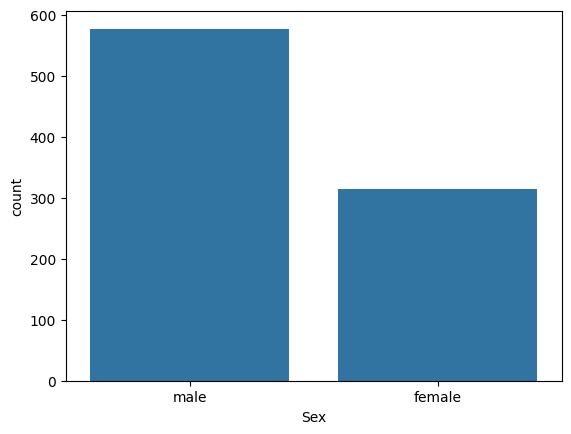

In [5]:
import seaborn as sns
sns.countplot (titanic, x='Sex')

In [6]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
titanic[5:16]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [11]:
titanic[titanic['Sex']=='male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic['Pclass']==1

,Pclass
0,False
1,True
2,False
3,True
4,False
...,...
886,False
887,True
888,False
889,True


In [14]:
(titanic['Pclass']==1) & (titanic ['Sex']=='male')

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,True


In [15]:
titanic[(titanic['Pclass']==1) & (titanic ['Sex']=='male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


In [16]:
titanic.iloc[10]

,10
PassengerId,11
Survived,1
Pclass,3
Name,"Sandstrom, Miss. Marguerite Rut"
Sex,female
Age,4.0
SibSp,1
Parch,1
Ticket,PP 9549
Fare,16.7


**HANDLING NULL VALUES**

In [18]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
titanic ['Age'].mean()

29.69911764705882

In [22]:
int(titanic['Age'].mean())

29

In [23]:
titanic ['Age']=titanic['Age'].fillna(int(titanic['Age'].mean()))
titanic['Embarked'].mode()

,Embarked
0,S


In [24]:
titanic['Embarked']=titanic ['Embarked'].fillna( titanic ['Embarked'].mode())

In [25]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [26]:
titanic.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [27]:
titanic.drop('Cabin', axis=1, inplace=True)

In [28]:
titanic.corr(numeric_only=True) ['Survived']

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.067814
SibSp,-0.035322
Parch,0.081629
Fare,0.257307


In [29]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [30]:
titanic.drop(['PassengerId', 'Name', 'SibSp'], axis=1, inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [32]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [33]:
titanic.drop(['Ticket'], axis=1, inplace=True)

**CONVERTING OBJECT TO FLOAT**

In [35]:
titanic['Sex'].replace(['male', 'female'], [1,2], inplace=True)
titanic

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,0,7.2500,S
1,1,1,2,38.0,0,71.2833,C
2,1,3,2,26.0,0,7.9250,S
3,1,1,2,35.0,0,53.1000,S
4,0,3,1,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,S
887,1,1,2,19.0,0,30.0000,S
888,0,3,2,29.0,2,23.4500,S
889,1,1,1,26.0,0,30.0000,C


In [36]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [38]:
titanic ['Embarked']=titanic ['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [39]:
titanic.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Parch,0
Fare,0
Embarked,0


In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [43]:
titanic ['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [44]:
embarked_unique=titanic['Embarked'].value_counts().index

In [45]:
len (embarked_unique)
titanic['Embarked'].replace(embarked_unique,range (len (embarked_unique)), inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [46]:
titanic


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,0,7.2500,0
1,1,1,2,38.0,0,71.2833,1
2,1,3,2,26.0,0,7.9250,0
3,1,1,2,35.0,0,53.1000,0
4,0,3,1,35.0,0,8.0500,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,0
887,1,1,2,19.0,0,30.0000,0
888,0,3,2,29.0,2,23.4500,0
889,1,1,1,26.0,0,30.0000,1


**FINDING CORRELATION**

In [50]:
titanic.corr()['Survived']

,Survived
Survived,1.000000
Pclass,-0.338481
Sex,0.543351
Age,-0.067814
Parch,0.081629
Fare,0.257307
Embarked,0.106811


**OUTLINER DETECTION**

<Axes: xlabel='Age'>

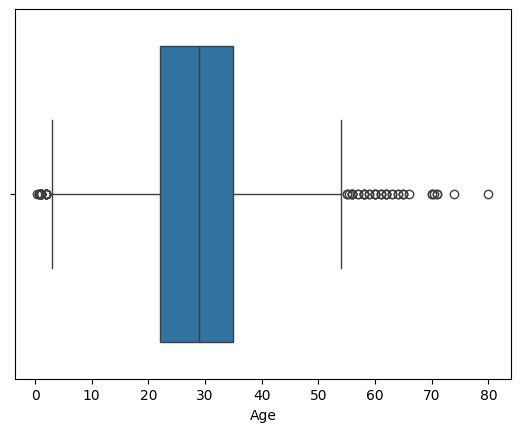

In [51]:
import seaborn as sns
sns.boxplot(titanic,x='Age')

In [52]:
import plotly.express as ex
ex.box(titanic, 'Age')

In [55]:
titanic[titanic['Age']>64].index

Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

In [56]:
titanic.drop(titanic [titanic['Age']>64].index, inplace=True)
titanic.shape

(880, 7)

In [57]:
X=titanic.drop('Survived', axis=1)
y=titanic['Survived']
print(X.shape,y.shape)

(880, 6) (880,)


**SPLITTING TEST AND TRAIN DATA**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(660, 6) (220, 6) (660,) (220,)


In [59]:
X_train

,Pclass,Sex,Age,Parch,Fare,Embarked
868,3,1,29.0,0,9.5000,0
669,1,2,29.0,0,52.0000,0
287,3,1,22.0,0,7.8958,0
484,1,1,25.0,0,91.0792,1
317,2,1,54.0,0,14.0000,0
...,...,...,...,...,...,...
725,3,1,20.0,0,8.6625,0
300,3,2,29.0,0,7.7500,2
296,3,1,23.5,0,7.2292,1
783,3,1,29.0,2,23.4500,0


In [60]:
y_train

,Survived
868,0
669,1
287,0
484,1
317,0
...,...
725,0
300,1
296,0
783,0


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=.2, random_state=0)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(704, 6) (176, 6) (704,) (176,)


**LOGISTIC REGRESSION**

In [64]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [66]:
print(*list(y_test))

0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1


In [67]:
model.score (X_test,y_test)*100

77.27272727272727

**SVM-SUPPORT VECTORE MACHINE**

In [68]:
from sklearn.svm import SVC
model_svc=SVC()

In [70]:
model_svc.fit(X_train,y_train)

SVC()

In [71]:
model_svc.score (X_test,y_test)*100

66.47727272727273

**DECISION TREE CLASSIFICATION**

In [73]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
model_dt.score (X_test,y_test)*100


76.70454545454545

In [76]:
titanic.to_csv('titanic_cleaned.csv',index=False)